Question 1


In [58]:
#Import necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


256


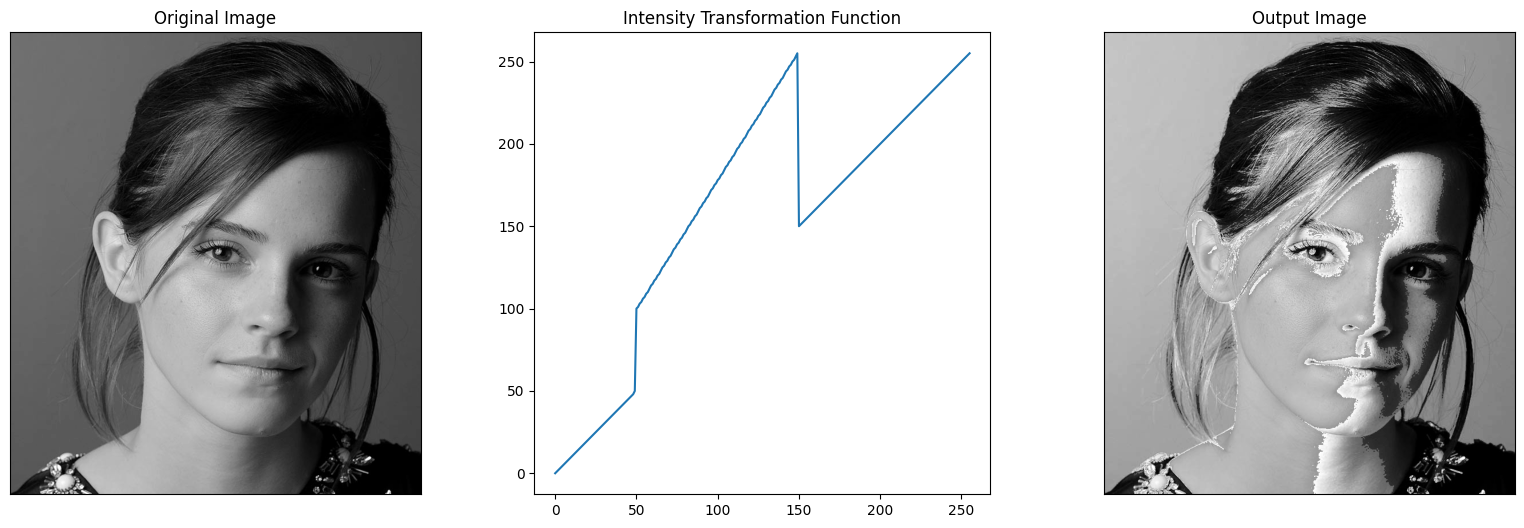

In [59]:
# Define the transformation
transform1 = np.concatenate((np.linspace(0, 50, 50), np.linspace(100, 255, 100), np.linspace(150, 255,106)), axis=0).astype(np.uint8)
print(len(transform1))

# Read the image
image_orig = cv.imread('a1images/a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply the transformation
image_transformed = cv.LUT(image_orig, transform1)

# Display the images
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].imshow(img_orig, cmap = "gray", vmin=0, vmax=255)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Original Image")
ax[1].plot(transform1)
ax[1].set_title("Intensity Transformation Function")
ax[2].imshow(image_transformed, cmap = "gray", vmin=0, vmax=255)
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
ax[2].set_title("Output Image")
plt.show()


Question 2

Part (a)

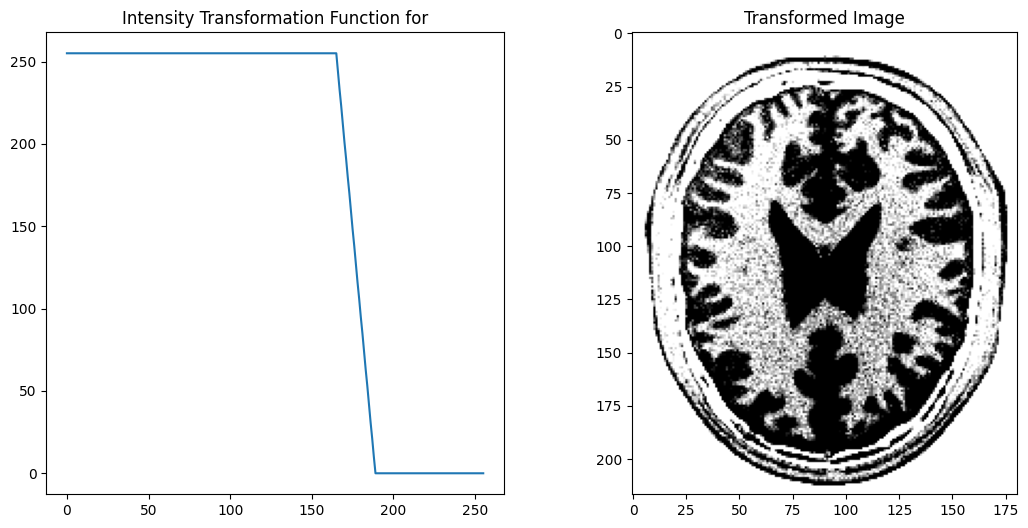

In [133]:
transform2 = np.concatenate((np.linspace(255, 255, 165), np.linspace(255,0, 25),np.linspace(0, 0,66)), axis=0).astype(np.uint8)
fig2 = cv.imread("a1images/a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

fig2_transformed_1 = cv.LUT(fig2, transform2)
fig, ax = plt.subplots(1, 2, figsize=(13, 6))
ax[0].plot(transform2)
ax[0].set_title("Intensity Transformation Function for")
ax[1].imshow(fig2_transformed_1, cmap = "gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(True)
ax[1].get_yaxis().set_visible(True)
ax[1].set_title("Transformed Image")

plt.show()

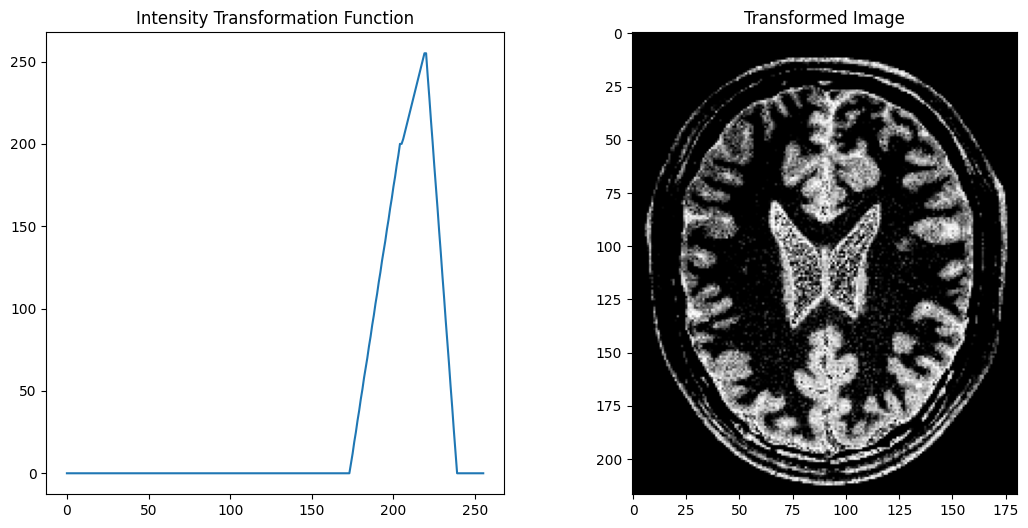

In [134]:
transform3 = np.concatenate((np.linspace(0, 0, 173), np.linspace(0, 200, 32), np.linspace(200, 255, 15),np.linspace(255, 0, 20),np.linspace(0, 0, 16)), axis=0).astype(np.uint8)
fig2 = cv.imread("a1images/a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

fig2_transformed_1 = cv.LUT(fig2, transform3)
fig, ax = plt.subplots(1, 2, figsize=(13, 6))
ax[0].plot(transform3)
ax[0].set_title("Intensity Transformation Function")
ax[1].imshow(fig2_transformed_1, cmap = "gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(True)
ax[1].get_yaxis().set_visible(True)
ax[1].set_title("Transformed Image")

plt.show()

Text(0, 0.5, 'Frequency')

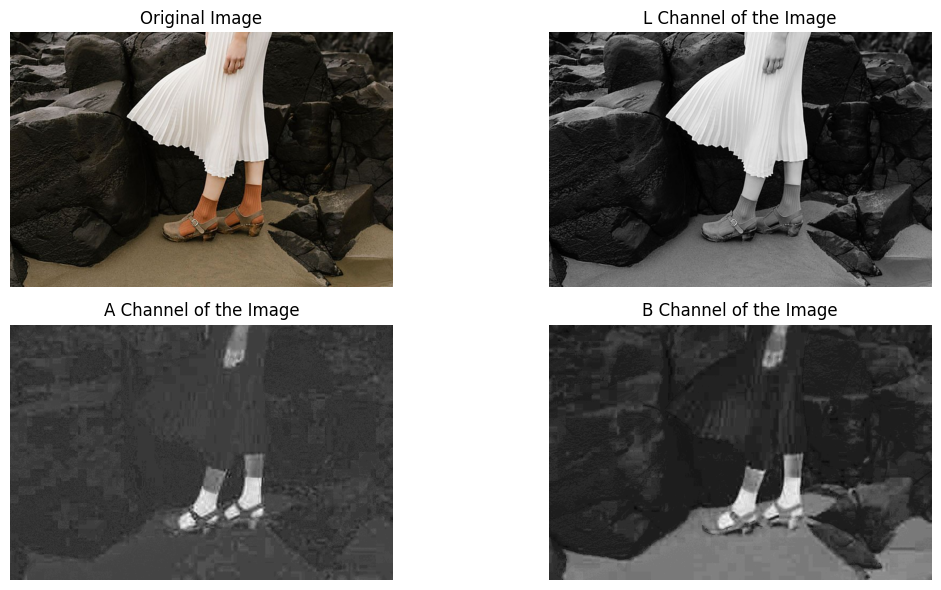

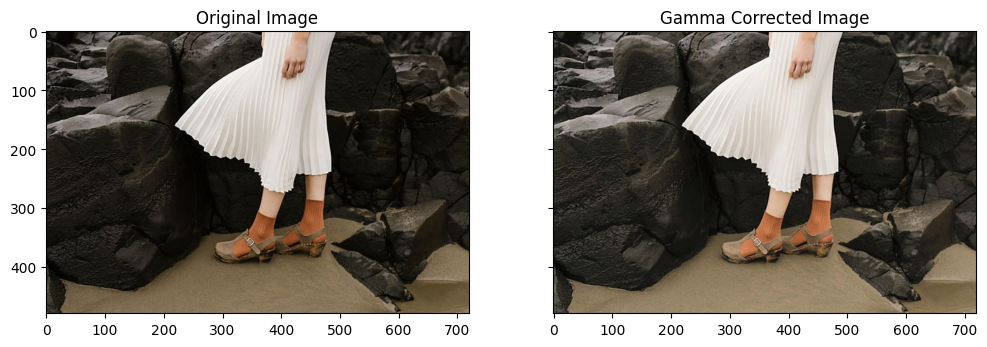

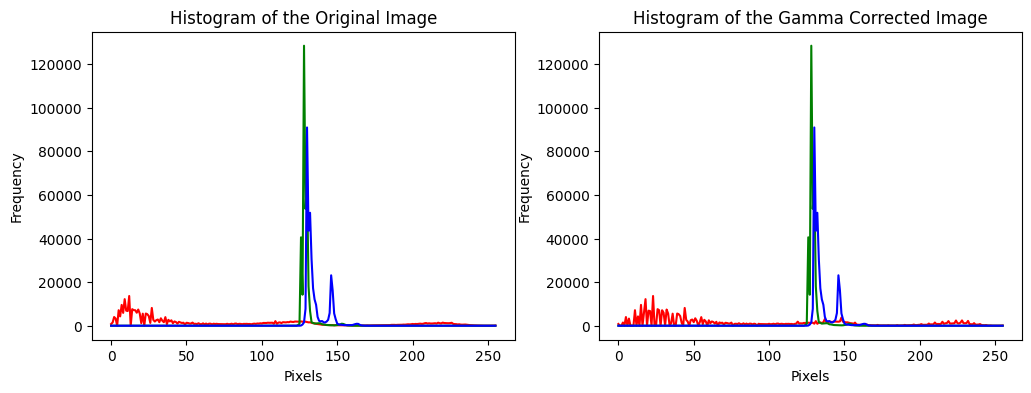

In [124]:
img_orig = cv.imread('a1images/a1images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)

img_rgb = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

img_ceilab = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)        # Convert the image into CEILAB color space  
l_channel, a_channel, b_channel = cv.split(img_ceilab)      # Split the converted image into three channels     

#region
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(l_channel, cmap="gray")
plt.title('L Channel of the Image')
plt.axis('off')

plt.subplot(223)
plt.imshow(a_channel, cmap="gray")
plt.title('A Channel of the Image')
plt.axis('off')

plt.subplot(224)
plt.imshow(b_channel, cmap="gray")
plt.title('B Channel of the Image')
plt.axis('off')

plt.tight_layout()
#endregion

gamma = 0.78
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')
l_channel_gamma_corrected = cv.LUT(l_channel, table)        # Apply gamma correction only for L channel
img_gamma = cv.merge((l_channel_gamma_corrected, a_channel, b_channel))     # Merge L channel with other channels
img_corrected = cv.cvtColor(img_gamma, cv.COLOR_Lab2RGB)

#region
fig, ax = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(12,6))
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image')

ax[1].imshow(img_corrected)
ax[1].set_title('Gamma Corrected Image')
#endregion

f, ax = plt.subplots(1, 2, figsize=(12, 4))
space = ('l', 'a', 'b')
color = ('r', 'g', 'b')

for i, c in enumerate(space):
    hist_orig = cv.calcHist([img_ceilab], [i], None, [256], [0, 256])       # Calculate histogram for original image
    ax[0].plot(hist_orig, color=color[i])
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256])       # Calculate histogram for gamma corrected image
    ax[1].plot(hist_gamma, color=color[i])

#region   
ax[0].set_title('Histogram of the Original Image')
ax[0].set_xlabel('Pixels')
ax[0].set_ylabel('Frequency')


ax[1].set_title('Histogram of the Gamma Corrected Image')
ax[1].set_xlabel('Pixels')
ax[1].set_ylabel('Frequency')